In [2]:
import sympy as sp
import Simplextep as sx
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Problem 1
objective_function = [0, 0, 0, 0, 1]
constraints = [[0, 0, -1, 1, -1], [0, 1, 0, -1, -1], [0, -1, 1, 0, -1], [1, 1, 1, 1, 0]]
equality = ["leq", "leq", "leq", "eq"]
parameters = [("x1", "+"), ("x2", "+"), ("x3", "+"), ("V", "+")]
mode = "min"

In [4]:
problem = sx.Problem_Prepration(objective_function=objective_function,
                                 constraints=constraints,
                                 equality=equality,
                                 parameters=parameters,
                                 mode=mode)
problem

[INFO] Add slack
[INFO] Add slack
[INFO] Add slack
[INFO] Add Artificial
[INFO] As we have minimize problem, we multiply the objective function by -1.
[INFO] Parameter x1 remains same.
[INFO] Parameter x2 remains same.
[INFO] Parameter x3 remains same.
[INFO] Parameter V remains same.


| B.V                  | R.H.S                | x1                   | x2                   | x3                   | V                    | s1                   | s2                   | s3                   | a1                   |
|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|
| s1                   | 0                    | 0                    | -1                   | 1                    | -1                   | 1                    | 0                    | 0                    | 0                    |
| s2                   | 0                    | 1                    | 0                    | -1                   | -1                   | 0                    | 1                    | 0                    | 0                    |
| s3                   | 0                    | -1                   | 1

In [5]:
simplex = sx.Simplex(problem=problem, decimal=2, number_of_dashes=7)
simplex.fit()

[INFO] Two phase solution
[INFO] Phase I starts | Finished
[INFO] Phase II Starts | Finished.
|    |   R.H.S |   x1 |   x2 |   x3 |    V |   s1 |   s2 |   s3 |   a1 |
|----|---------|------|------|------|------|------|------|------|------|
|  0 |    0.00 | 0.33 | 0.33 | 0.33 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |


In [6]:
simplex.make_table(format_="latex")

\begin{tabular}{llllllllll}
\hline
 B.V     & R.H.S   & x1      & x2      & x3      & V       & s1      & s2      & s3      & a1      \\
\hline
 s1      & 0.0     & 0.0     & -1.0    & 1.0     & -1.0    & 1.0     & 0.0     & 0.0     & 0.0     \\
 s2      & 0.0     & 1.0     & 0.0     & -1.0    & -1.0    & 0.0     & 1.0     & 0.0     & 0.0     \\
 s3      & 0.0     & -1.0    & 1.0     & 0.0     & -1.0    & 0.0     & 0.0     & 1.0     & 0.0     \\
 a1      & 1.0     & 1.0     & 1.0     & 1.0     & 0.0     & 0.0     & 0.0     & 0.0     & 1.0     \\
 -z1     & 0.0     & 0.0     & 0.0     & 0.0     & -1.0    & 0.0     & 0.0     & 0.0     & 0.0     \\
 -w1     & 0.0     & 0.0     & 0.0     & 0.0     & 0.0     & 0.0     & 0.0     & 0.0     & -1.0    \\
 ------- & ------- & ------- & ------- & ------- & ------- & ------- & ------- & ------- & ------- \\
 s1      & 0.0     & 0.0     & -1.0    & 1.0     & -1.0    & 1.0     & 0.0     & 0.0     & 0.0     \\
 s2      & 0.0     & 1.0     & 0.0     &

In [7]:
dual = sx.Dual(constraints=constraints, objective_function=objective_function,
               equality=equality, parameters=parameters, mode=mode)
dual.fit()

[INFO] Dual Problem setting is set successfully.
[INFO] Add slack
[INFO] Add slack
[INFO] Add slack
[INFO] Add slack
[INFO] Parameter y1 remains same.
[INFO] Parameter y2 remains same.
[INFO] Parameter y3 remains same.
[INFO] Parameter y4 changed to y4' and y4''(y4 = y4' - y4'')
[INFO] Dual New Problem had been made successfully.


In [8]:
simplex_dual = sx.Simplex(problem=dual.problem)
simplex.fit()


[INFO] One phase solution
Finished.
|    |   R.H.S |   x1 |   x2 |   x3 |    V |   s1 |   s2 |   s3 |   a1 |
|----|---------|------|------|------|------|------|------|------|------|
|  0 |    0.00 | 0.33 | 0.33 | 0.33 | 0.00 | 0.00 | 0.00 | 0.00 | 0.00 |


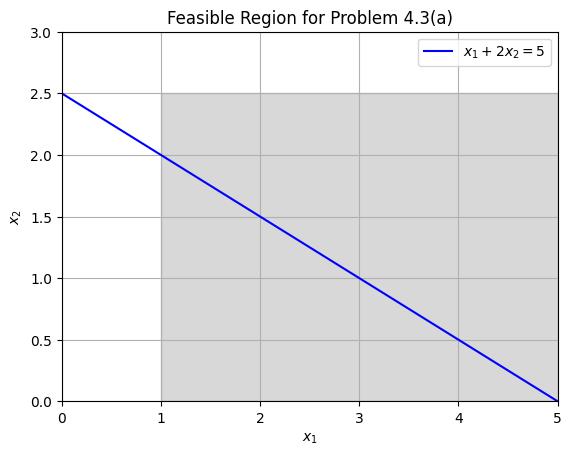

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define x1 and x2 as line ranges
x1 = np.linspace(0, 5, 400)
x2_eq = (5 - x1) / 2  # from x1 + 2x2 = 5

# Set up the plot
# plt.figure(figsize=(8, 6))

# Plot the equality constraint x1 + 2x2 = 5
plt.plot(x1, x2_eq, label=r"$x_1 + 2x_2 = 5$", color='blue')

# Shade the feasible region defined by x1 >= 1
plt.fill_betweenx(x2_eq, 1, 5, color='gray', alpha=0.3)

# Set limits based on the problem's constraints
plt.xlim(0, 5)
plt.ylim(0, 3)

# Plot boundaries for non-negativity constraints
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)

# Labels and legend
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.title("Feasible Region for Problem 4.3(a)")
plt.grid()
plt.savefig("Figs/q_9_a.svg")

Iteration 1:
Current Point: x = [2.  1.5]
Direction: [0. 0.]
Invalid step size encountered.


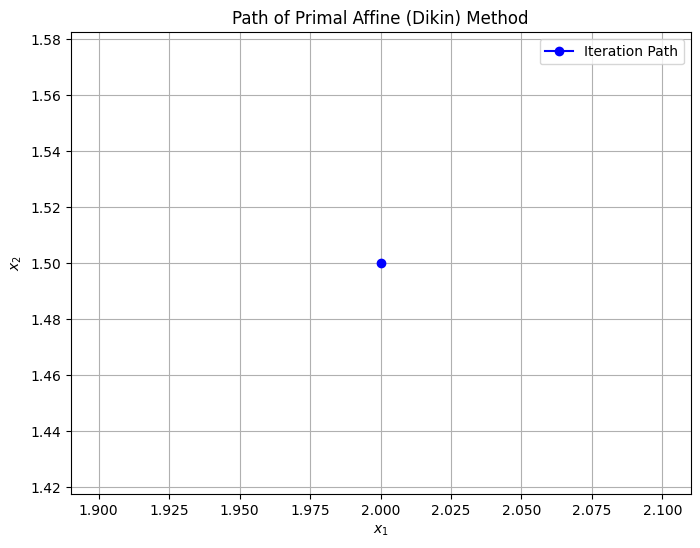

Final Solution:
x = [2.  1.5], Objective Value = -1.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial feasible point
x = np.array([2.0, 1.5])  # Initial point (x1, x2)

# Define the objective function gradient
def objective_gradient(x):
    return np.array([1, -2])  # Gradient of x1 - 2*x2

# Define the constraint as Ax = b
A = np.array([[1, 2]])   # Coefficients of equality constraint
b = np.array([5])

# Define the inequality bounds: x1 >= 1, x1 >= 0, x2 >= 0
bounds = [1, 0, 0]  # Constraints for x1 >= 1, x1 >= 0, x2 >= 0

# Set parameters for the Dikin method
tolerance = 1e-5
max_iterations = 100
alpha = 0.1  # Step size multiplier to ensure steps remain within feasible region

# Storage for plotting
path = [x.copy()]

# Start the Dikin method iterations
for iteration in range(max_iterations):
    # Calculate the gradient of the objective at the current point
    grad = objective_gradient(x)
    
    # Calculate the direction of movement
    direction = np.linalg.pinv(A) @ (b - A @ x)  # Move towards satisfying the equality constraint

    # Debugging print statements
    print(f"Iteration {iteration + 1}:")
    print(f"Current Point: x = {x}")
    print(f"Direction: {direction}")

    # Calculate step size carefully to avoid invalid values
    try:
        step_size = alpha * min(
            (bounds[0] - x[0]) / direction[0] if direction[0] > 0 else np.inf,
            (bounds[1] - x[0]) / direction[0] if direction[0] > 0 else np.inf,
            (bounds[2] - x[1]) / direction[1] if direction[1] > 0 else np.inf,
        )
    except ZeroDivisionError:
        print("ZeroDivisionError encountered in step size calculation.")
        break

    # Check if step size is valid (non-NaN)
    if np.isnan(step_size) or step_size == np.inf:
        print("Invalid step size encountered.")
        break

    # Update point
    x_new = x + step_size * direction
    
    # Check for convergence
    if np.linalg.norm(x_new - x) < tolerance:
        print("Convergence reached.")
        break

    # Update x and store path
    x = x_new
    path.append(x.copy())

# Convert path to numpy array for easier handling
path = np.array(path)

# Plot each iteration step
plt.figure(figsize=(8, 6))
plt.plot(path[:, 0], path[:, 1], 'bo-', label="Iteration Path")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Path of Primal Affine (Dikin) Method")
plt.grid()
plt.legend()
plt.show()

# Final solution
print("Final Solution:")
print(f"x = {x}, Objective Value = {x[0] - 2 * x[1]}")


In [13]:
from scipy.optimize import linprog

# Objective coefficients (c in the form of c^T x)
c = [1, -2]

# Constraint coefficients
A_eq = [[1, 2]]
b_eq = [5]
bounds = [(1, None), (0, None)]  # x1 >= 1, x1 >= 0, x2 >= 0

# Solve using linprog
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Output result
optimal_solution = result.x
optimal_value = result.fun
optimal_solution, optimal_value


(array([1., 2.]), -3.0)

In [14]:
# Solve using the simplex method for comparison
result_simplex = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')

# Output result
optimal_solution_simplex = result_simplex.x
optimal_value_simplex = result_simplex.fun
optimal_solution_simplex, optimal_value_simplex


C:\Users\keipj\AppData\Local\Temp\ipykernel_13996\3847597278.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result_simplex = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='simplex')


(array([1., 2.]), np.float64(-3.0))

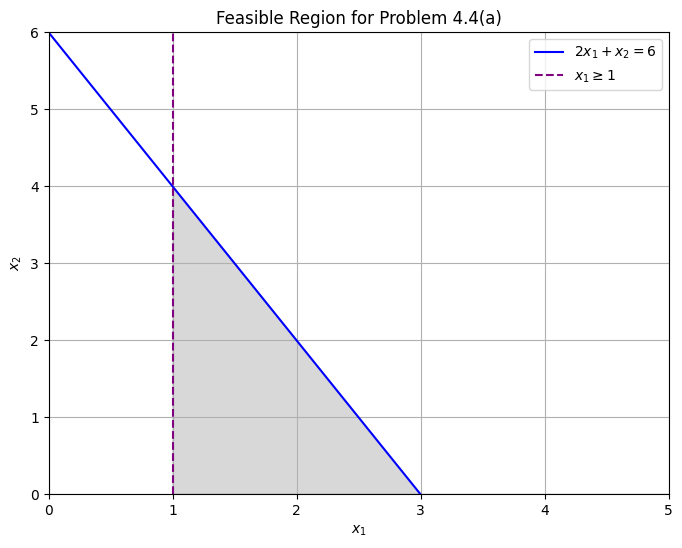

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define x1 range and x2 based on the constraint 2x1 + x2 = 6
x1 = np.linspace(0, 5, 400)
x2_constraint = 6 - 2 * x1  # from 2x1 + x2 = 6

# Set up the plot
plt.figure(figsize=(8, 6))

# Plot the inequality constraint boundary 2x1 + x2 = 6
plt.plot(x1, x2_constraint, label=r"$2x_1 + x_2 = 6$", color='blue')

# Shade the feasible region
plt.fill_between(x1, 0, x2_constraint, where=(x1 >= 1), color='gray', alpha=0.3)

# Plot x1 >= 1 as a vertical line and apply shading
plt.axvline(1, color='purple', linestyle='--', label=r"$x_1 \geq 1$")

# Set limits based on the problem's constraints
plt.xlim(0, 5)
plt.ylim(0, 6)

# Plot boundaries for non-negativity constraints
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)

# Labels and legend
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.title("Feasible Region for Problem 4.4(a)")
plt.grid()
plt.savefig("Figs/q_10_a.svg")


In [20]:
from scipy.optimize import linprog

# Define the modified objective function with Big-M
M = 1e6  # A large penalty value
c = [2, 3, M]  # Objective: 2x1 + 3x2 + My1 (to penalize artificial variable y1)

# Add artificial variable to constraint
A_ub = [[2, 1, 1]]  # Constraint: 2x1 + x2 + y1 <= 6
b_ub = [6]

# Additional constraint for x1 >= 1
A_eq = [[1, 0, 0]]
b_eq = [1]

# Variable bounds (x1, x2 >= 0, y1 >= 0)
bounds = [(0, None), (0, None), (0, None)]

# Solve using linprog
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Extract the solution
x1_init, x2_init, y1 = result.x
initial_feasible_solution = (x1_init, x2_init)
initial_feasible_solution, result.fun


((np.float64(1.0), np.float64(0.0)), 2.0)

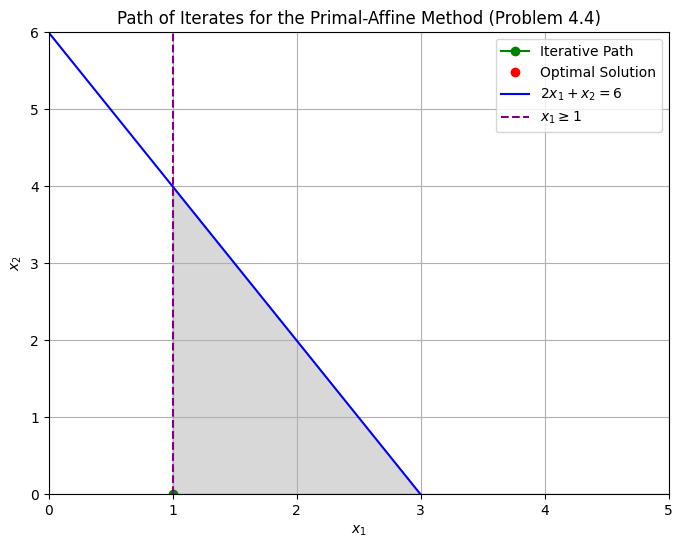

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function coefficients for minimization
c = np.array([2, 3])

# Initial feasible point (from Part b)
x1, x2 = initial_feasible_solution
iterations = [(x1, x2)]  # Store each iteration for plotting

# Define parameters for Primal-Affine method
tolerance = 1e-6
max_iterations = 20
alpha = 0.1  # Step size scaling factor

# Define the constraint gradient and Hessian of the objective
def gradient(x1, x2):
    return np.array([2, 3])

def hessian():
    return np.eye(2)  # Simplified for this linear case

# Iteratively apply Primal-Affine method
for _ in range(max_iterations):
    grad = gradient(x1, x2)
    hess_inv = np.linalg.inv(hessian())
    direction = -alpha * hess_inv @ grad  # Primal-affine step

    # Update x1, x2 for next iteration
    x1, x2 = x1 + direction[0], x2 + direction[1]

    # Check feasibility and adjust if necessary
    if x1 < 1:
        x1 = 1  # Enforce constraint x1 >= 1
    if x1 + 2 * x2 > 6:
        x2 = (6 - 2 * x1) / 1  # Adjust to maintain feasibility

    # Store for visualization
    iterations.append((x1, x2))

    # Stopping criterion
    if np.linalg.norm(direction) < tolerance:
        break

# Plotting the path of iterates
x_values, y_values = zip(*iterations)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'o-', color="green", label="Iterative Path")
plt.plot(x1, x2, 'ro', label="Optimal Solution")

# Plot the feasible region and constraints again for reference
x1 = np.linspace(0, 5, 400)
x2_constraint = 6 - 2 * x1
plt.plot(x1, x2_constraint, label=r"$2x_1 + x_2 = 6$", color='blue')
plt.fill_between(x1, 0, x2_constraint, where=(x1 >= 1), color='gray', alpha=0.3)
plt.axvline(1, color='purple', linestyle='--', label=r"$x_1 \geq 1$")
plt.xlim(0, 5)
plt.ylim(0, 6)

# Final touches on the plot
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.title("Path of Iterates for the Primal-Affine Method (Problem 4.4)")
plt.grid()
plt.savefig("Figs/q_10_c.svg")

In [32]:
from scipy.optimize import linprog

# Example coefficients for primal problem
c = [1, 2]  # Objective function coefficients for primal
A = [[1, 1], [-1, 2], [2, 1]]  # Coefficients for inequalities in primal
b = [4, 2, 7]  # Right-hand side values for primal

# Solve primal (maximize) by converting to minimization (linprog minimizes by default)
res_primal = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method='highs')
primal_solution = res_primal.x
primal_value = res_primal.fun

# Example coefficients for dual problem (transpose of A and c)
c_dual = b  # Objective function coefficients for dual
A_dual = [[1, -1, 2], [1, 2, 1]]  # Coefficients for inequalities in dual
b_dual = c  # Right-hand side values for dual

# Solve dual (minimize)
res_dual = linprog(c_dual, A_ub=A_dual, b_ub=b_dual, bounds=(0, None), method='highs')
dual_solution = res_dual.x
dual_value = res_dual.fun

primal_solution, primal_value, dual_solution, dual_value


(array([0., 0.]), 0.0, array([0., 0., 0.]), 0.0)

In [33]:
# Compute t
t = sum(primal_solution) + sum(dual_solution) + 1

# Scale x_j and y_i
x_bar = [t * xj for xj in primal_solution]
y_bar = [t * yi for yi in dual_solution]

# Display results
t, x_bar, y_bar


(np.float64(1.0),
 [np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(0.0)])